In [68]:
import pandas as pd

In [69]:
df = pd.read_csv("salaries.csv")
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [70]:
inputs = df.drop("salary_more_then_100k", axis=1)
target = df["salary_more_then_100k"]

In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
l_company =LabelEncoder()
l_job =LabelEncoder()
l_degree =LabelEncoder()

In [73]:
inputs["l_company"] = l_company.fit_transform(inputs["company"])
inputs["l_job"] = l_company.fit_transform(inputs["job"])
inputs["l_degree"] = l_company.fit_transform(inputs["degree"])
inputs

,company,job,degree,l_company,l_job,l_degree
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [74]:
l_inputs = inputs.drop(["company","job","degree"], axis = 1)
l_inputs

,l_company,l_job,l_degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [75]:
from sklearn.model_selection import train_test_split

In [85]:
input_train,input_test,target_train,target_test = train_test_split(l_inputs,target,train_size=0.4)

In [86]:
from sklearn import tree

In [87]:
model = tree.DecisionTreeClassifier()
model.fit(input_train,target_train)

DecisionTreeClassifier()

In [88]:
model.score(input_test,target_test)

0.5

In [89]:
target_predicted = model.predict(input_test)
from sklearn.metrics import confusion_matrix

In [90]:
cm = confusion_matrix(target_test,target_predicted)
cm

array([[1, 4],
       [1, 4]], dtype=int64)

In [91]:
import matplotlib.pyplot as plt
import seaborn as sn

Text(95.72222222222221, 0.5, 'predicted value')

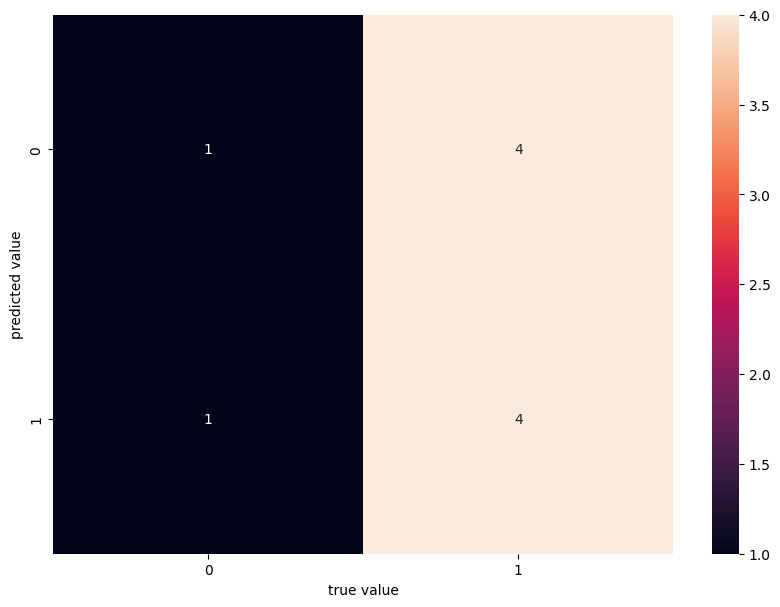

In [92]:
%matplotlib inline
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True)
plt.xlabel("true value")
plt.ylabel("predicted value")
